In [1]:
import os
from pathlib import Path

from dotenv import load_dotenv

load_dotenv()
root_data = os.getenv("KAGGLE_FILES_DIR")
dataset_path = Path(os.getcwd(), "..", root_data)
raw = Path(dataset_path, "raw")

#### Read raw data

In [2]:
import pandas as pd
df = pd.read_csv(Path(raw, "covid_data.csv"))

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


#### Preprocess data using script

In [4]:
from scripts.data import preprocess_data

preprocess_data(dataset_path)


Reading data from dataset path: /Users/isulim/Sages/inzynier-ai/xgboost-mlflow/notebooks/../data/raw
Dropping missing values in relevant columns.
Dropping irrelevant columns.
Mapping binary values to 0-1
Renaming columns.
Saving X and y to CSV in: /Users/isulim/Sages/inzynier-ai/xgboost-mlflow/notebooks/../data/preprocessed
Preprocessing finished.


#### Read preprocessed datasets

In [5]:
X = pd.read_csv(Path(dataset_path, "preprocessed", "X_pre.csv"))
y = pd.read_csv(Path(dataset_path, "preprocessed", "y_pre.csv"))

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

#### Split data into train, validation and test (80%/10%/10%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

#### Train simple model with XGBClassifier

In [8]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBClassifier(**params)
model_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.22998
[1]	validation_0-logloss:0.19836
[2]	validation_0-logloss:0.17792
[3]	validation_0-logloss:0.16418
[4]	validation_0-logloss:0.15473
[5]	validation_0-logloss:0.14821
[6]	validation_0-logloss:0.14368
[7]	validation_0-logloss:0.14051
[8]	validation_0-logloss:0.13832
[9]	validation_0-logloss:0.13683
[10]	validation_0-logloss:0.13580
[11]	validation_0-logloss:0.13512
[12]	validation_0-logloss:0.13467
[13]	validation_0-logloss:0.13439
[14]	validation_0-logloss:0.13424
[15]	validation_0-logloss:0.13415
[16]	validation_0-logloss:0.13413
[17]	validation_0-logloss:0.13413
[18]	validation_0-logloss:0.13415
[19]	validation_0-logloss:0.13417
[20]	validation_0-logloss:0.13421
[21]	validation_0-logloss:0.13427
[22]	validation_0-logloss:0.13431
[23]	validation_0-logloss:0.13436
[24]	validation_0-logloss:0.13441
[25]	validation_0-logloss:0.13446
[26]	validation_0-logloss:0.13450
[27]	validation_0-logloss:0.13454
[28]	validation_0-logloss:0.13457
[29]	validation_0-loglos

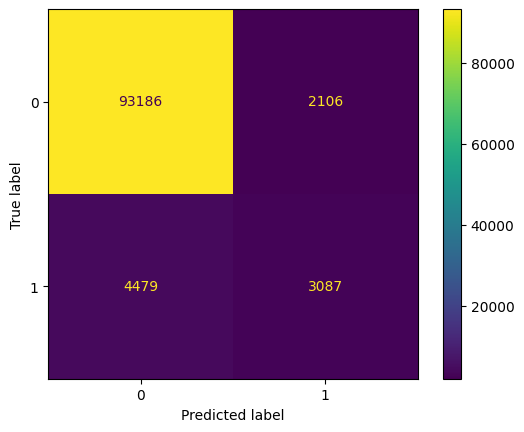

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

#### Train simple model with XGB Random Forest Classifier

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBRFClassifier(**params)
model_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.18065
acc=0.930224192576173
roc=0.7810445637887908
f1=0.5610129059881338
prec=0.5221450529431857
rec=0.606132698916204


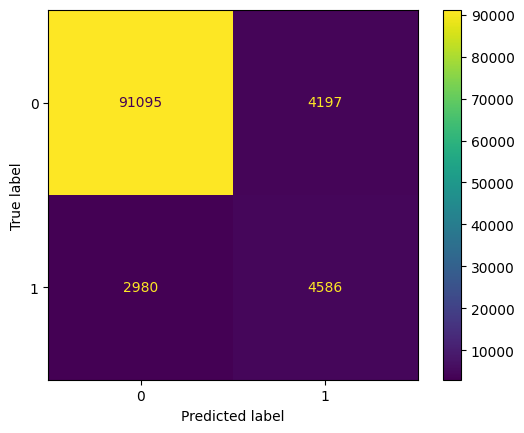

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

XGBRFClassifier returns better results.  
But Confusion Matrix of both models look like data is overfitted. True positive results are in the same range like false positive and false negative.   
I will try to balance my dataset. I have lots of records, so I will use undersampling.

In [12]:
from imblearn.under_sampling import RandomUnderSampler

undersampling = RandomUnderSampler(sampling_strategy="majority")

#### Redo simple model fitting with rebalanced datasets (undersampling)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_und, y_train_und = undersampling.fit_resample(X_train, y_train)


In [14]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBClassifier(**params)
model_cls.fit(X_train_und, y_train_und, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.51452
[1]	validation_0-logloss:0.42174
[2]	validation_0-logloss:0.36783
[3]	validation_0-logloss:0.33530
[4]	validation_0-logloss:0.31556
[5]	validation_0-logloss:0.30361
[6]	validation_0-logloss:0.29655
[7]	validation_0-logloss:0.29260
[8]	validation_0-logloss:0.29057
[9]	validation_0-logloss:0.28984
[10]	validation_0-logloss:0.28981
[11]	validation_0-logloss:0.29034
[12]	validation_0-logloss:0.29112
[13]	validation_0-logloss:0.29205
[14]	validation_0-logloss:0.29297
[15]	validation_0-logloss:0.29393
[16]	validation_0-logloss:0.29484
[17]	validation_0-logloss:0.29565
[18]	validation_0-logloss:0.29648
[19]	validation_0-logloss:0.29730
[20]	validation_0-logloss:0.29802
[21]	validation_0-logloss:0.29861
[22]	validation_0-logloss:0.29913
[23]	validation_0-logloss:0.29968
[24]	validation_0-logloss:0.30018
[25]	validation_0-logloss:0.30058
[26]	validation_0-logloss:0.30095
[27]	validation_0-logloss:0.30128
[28]	validation_0-logloss:0.30155
[29]	validation_0-loglos

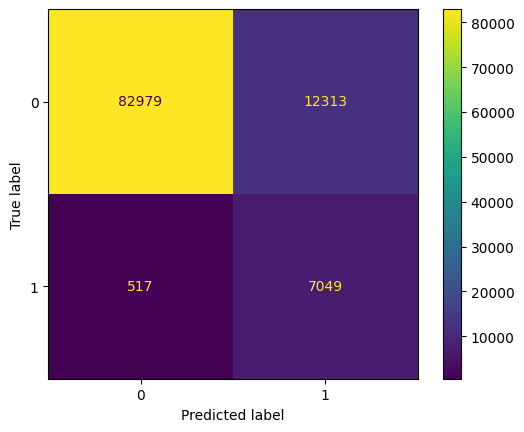

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [16]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBRFClassifier(**params)
model_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.18065
acc=0.930224192576173
roc=0.7810445637887908
f1=0.5610129059881338
prec=0.5221450529431857
rec=0.606132698916204


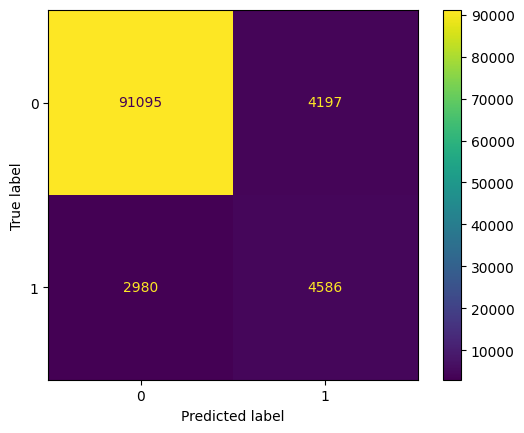

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

#### Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler

oversampling = RandomOverSampler(sampling_strategy="minority")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_over, y_train_over = oversampling.fit_resample(X_train, y_train)


In [20]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBClassifier(**params)
model_cls.fit(X_train_over, y_train_over, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.51262
[1]	validation_0-logloss:0.41860
[2]	validation_0-logloss:0.36388
[3]	validation_0-logloss:0.33064
[4]	validation_0-logloss:0.31011
[5]	validation_0-logloss:0.29742
[6]	validation_0-logloss:0.28953
[7]	validation_0-logloss:0.28471
[8]	validation_0-logloss:0.28174
[9]	validation_0-logloss:0.27993
[10]	validation_0-logloss:0.27885
[11]	validation_0-logloss:0.27822
[12]	validation_0-logloss:0.27788
[13]	validation_0-logloss:0.27769
[14]	validation_0-logloss:0.27759
[15]	validation_0-logloss:0.27756
[16]	validation_0-logloss:0.27753
[17]	validation_0-logloss:0.27755
[18]	validation_0-logloss:0.27759
[19]	validation_0-logloss:0.27762
[20]	validation_0-logloss:0.27766
[21]	validation_0-logloss:0.27770
[22]	validation_0-logloss:0.27775
[23]	validation_0-logloss:0.27777
[24]	validation_0-logloss:0.27781
[25]	validation_0-logloss:0.27785
[26]	validation_0-logloss:0.27790
[27]	validation_0-logloss:0.27792
[28]	validation_0-logloss:0.27793
[29]	validation_0-loglos

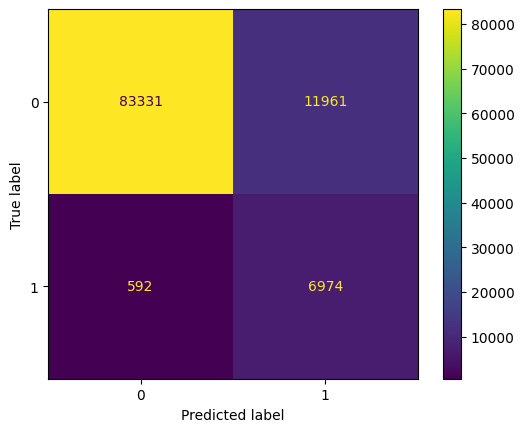

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

In [22]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBRFClassifier(**params)
model_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")


[0]	validation_0-logloss:0.18065
acc=0.930224192576173
roc=0.7810445637887908
f1=0.5610129059881338
prec=0.5221450529431857
rec=0.606132698916204


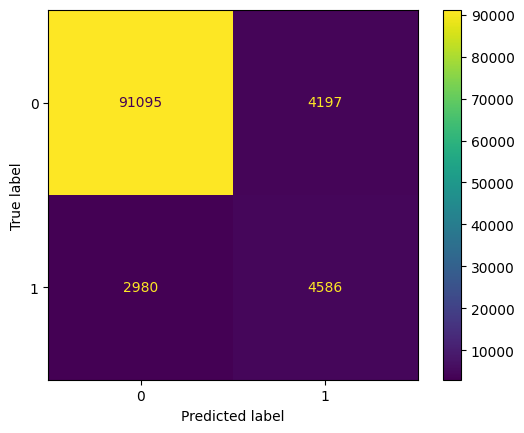

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()

#### SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)



[0]	validation_0-logloss:0.51227
[1]	validation_0-logloss:0.41810
[2]	validation_0-logloss:0.36334
[3]	validation_0-logloss:0.33006
[4]	validation_0-logloss:0.30954
[5]	validation_0-logloss:0.29677
[6]	validation_0-logloss:0.28888
[7]	validation_0-logloss:0.28400
[8]	validation_0-logloss:0.28105
[9]	validation_0-logloss:0.27924
[10]	validation_0-logloss:0.27818
[11]	validation_0-logloss:0.27758
[12]	validation_0-logloss:0.27724
[13]	validation_0-logloss:0.27705
[14]	validation_0-logloss:0.27694
[15]	validation_0-logloss:0.27689
[16]	validation_0-logloss:0.27691
[17]	validation_0-logloss:0.27692
[18]	validation_0-logloss:0.27696
[19]	validation_0-logloss:0.27698
[20]	validation_0-logloss:0.27703
[21]	validation_0-logloss:0.27705
[22]	validation_0-logloss:0.27707
[23]	validation_0-logloss:0.27710
[24]	validation_0-logloss:0.27713
[25]	validation_0-logloss:0.27716
[26]	validation_0-logloss:0.27719
[27]	validation_0-logloss:0.27722
[28]	validation_0-logloss:0.27727
[29]	validation_0-loglos

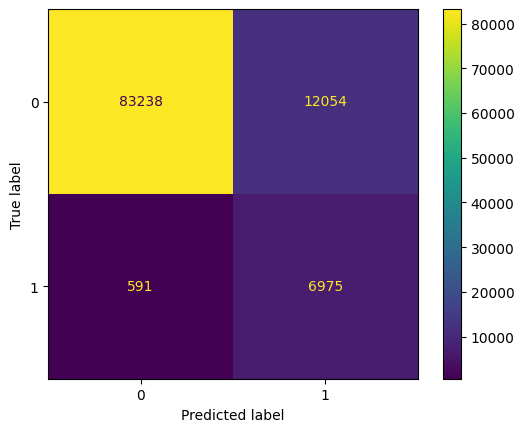

In [25]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBClassifier(**params)
model_cls.fit(X_train_over, y_train_over, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()


[0]	validation_0-logloss:0.18065
acc=0.930224192576173
roc=0.7810445637887908
f1=0.5610129059881338
prec=0.5221450529431857
rec=0.606132698916204


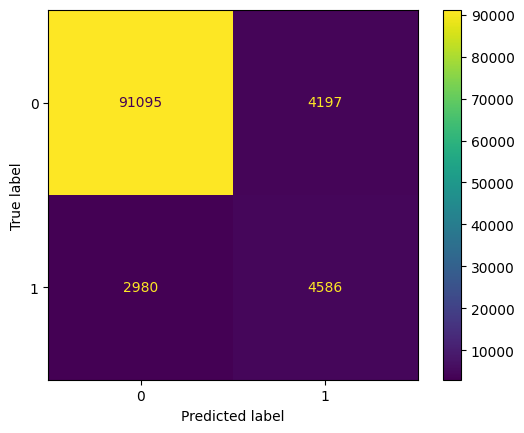

In [26]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
params = {
    "objective": "binary:logistic",
    "n_estimators": 300,
    "max_depth": 20,
}
model_cls = xgb.XGBRFClassifier(**params)
model_cls.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = model_cls.predict(X_test)
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"{acc=}")
print(f"{roc=}")
print(f"{f1=}")
print(f"{prec=}")
print(f"{rec=}")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()


Undersampling and Oversapling datasets gave similar results.  
Confusion Matrices show better results than on raw data, but models still need more fine-tuning.  
Both models are performing similarly, so selection of a model (Classifier vs RandomForestClassifier) should also be available as a choice before optimization.